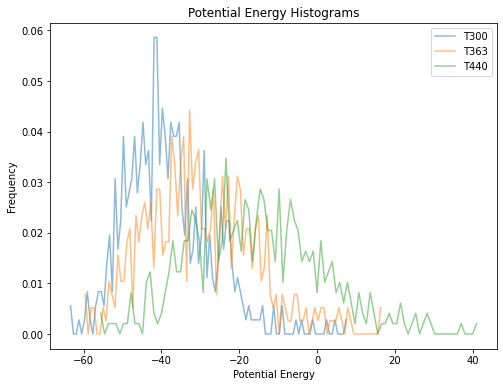

In [10]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

def compute_histogram(energy_data, bins=100):
    hist, edges = np.histogram(energy_data, bins=bins, density=True)
    bin_centers = (edges[:-1] + edges[1:]) / 2.0
    return bin_centers, hist

# Load potential energy data for each replica
energy_data_T300 = np.loadtxt('./T300/potential_energy_300.xvg', comments=['@', '#'])[:,1]
energy_data_T363 = np.loadtxt('./T363/potential_energy_363.xvg', comments=['@', '#'])[:,1]
energy_data_T440 = np.loadtxt('./T440/potential_energy_440.xvg', comments=['@', '#'])[:,1]

# Plot histograms for each replica
plt.figure(figsize=(8, 6))
T300_bin, hist = compute_histogram(energy_data_T300)
plt.plot(T300_bin, hist, alpha=0.5, label="T300")
T363_bin, hist = compute_histogram(energy_data_T363)
plt.plot(T363_bin, hist, alpha=0.5, label="T363")
T440_bin, hist = compute_histogram(energy_data_T440)
plt.plot(T440_bin, hist, alpha=0.5, label="T440")

plt.xlabel("Potential Energy")
plt.ylabel("Frequency")
plt.title("Potential Energy Histograms")
plt.savefig('../Figures/Potential_Energy_Histograms.png')
plt.legend()
plt.show()



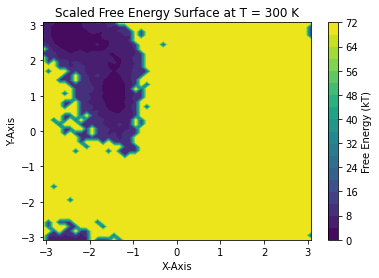

In [12]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

# Load the trajectory file
traj = md.load("adpT.trr", top="adpT.gro")

# Compute the phi and psi dihedral angles
phi_indices, phi_angles=md.compute_phi(traj)
psi_indices, psi_angles=md.compute_psi(traj)

# 2D histogram
histogram, xedges, yedges = np.histogram2d(phi_angles.ravel(), psi_angles.ravel(), bins=50)

# Calculate the free energy surface (FES) and scale it to 10 kT
kT = 0.0083145 * 300  # Boltzmann constant * temperature (300 K)

# Add a small value to avoid taking the log of zero
histogram += 1e-10

free_energy = - kT * np.log(histogram)
free_energy -= free_energy.min()  

plt.contourf((xedges[:-1] + xedges[1:]) / 2, (yedges[:-1] + yedges[1:]) / 2, free_energy.T, levels=20, cmap='viridis')

# Create a 2D plot of the scaled FES
plt.colorbar(label="Free Energy (kT)")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Scaled Free Energy Surface at T = 300 K")
plt.savefig('../Figures/Scaled_Free_Energy_Surface.png')

# Save or display the plot
plt.show()


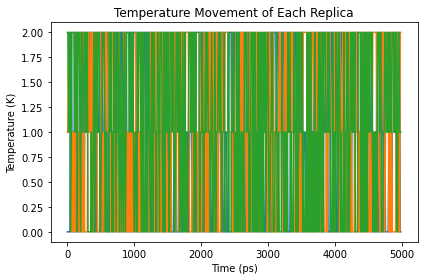

In [14]:
time,*temperatures=np.loadtxt('./replica_index.xvg',unpack=True)

# Considering every 100th frame
time = time[::100]
temperatures = [temp[::100] for temp in temperatures]

# Plotting each replica
for idx, temp in enumerate(temperatures, start=1):
    plt.plot(time, temp, label=f'Replica {idx}')

plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Movement of Each Replica')

plt.tight_layout()
plt.savefig('../Figures/Scaled_Free_Energy_Surface.png')